In [10]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x = np.linspace(0,1,20)
y = np.linspace(0,1,20)

h = x[1]-x[0]
print(h)

0.05263157894736842


In [3]:
rq = [0.51,0.2]

In [4]:
def Potencial(x,y):
    return 1./np.sqrt( (x-rq[0])**2 + (y-rq[1])**2  ) - 1./np.sqrt( (x-rq[0])**2 + (y+rq[1])**2  ) 

In [9]:
X,Y = np.meshgrid(x,y)
V = Potencial(X,Y)

<IPython.core.display.Javascript object>


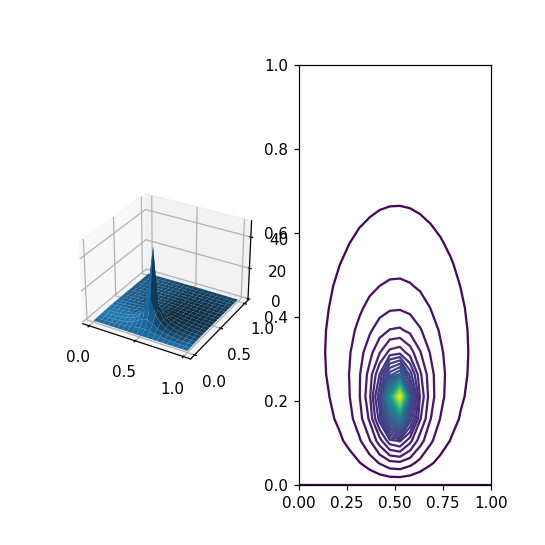

In [16]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,2,1,projection='3d')
ax1 = fig.add_subplot(1,2,2)

ax.plot_surface(X,Y,V)
ax1.contour(X,Y,V,50)

In [ ]:
def Dx(f,x,y,h):
    return (f(x+h,y)-f(x-h,y))/(2*h)